# ANN

In [1]:
# LIBRERÍAS
import os
import shutil
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
# Directorio donde están las imágenes mezcladas
image_dir = "../data/train"

# Directorios de destino
cats_dir = "../data/train/cats/"
dogs_dir = "../data/train/dogs/"

# Crear carpetas si no existen
os.makedirs(cats_dir, exist_ok=True)
os.makedirs(dogs_dir, exist_ok=True)

# Recorrer las imágenes y moverlas según su nombre
for filename in os.listdir(image_dir):
    src_path = os.path.join(image_dir, filename)

    if filename.startswith("cat."):
        dst_path = os.path.join(cats_dir, filename)
    elif filename.startswith("dog."):
        dst_path = os.path.join(dogs_dir, filename)
    else:
        continue  # Si el archivo no es ni gato ni perro, lo ignoramos

    shutil.move(src_path, dst_path)

print("✅ Imágenes organizadas correctamente en 'cats/' y 'dogs/'")

✅ Imágenes organizadas correctamente en 'cats/' y 'dogs/'


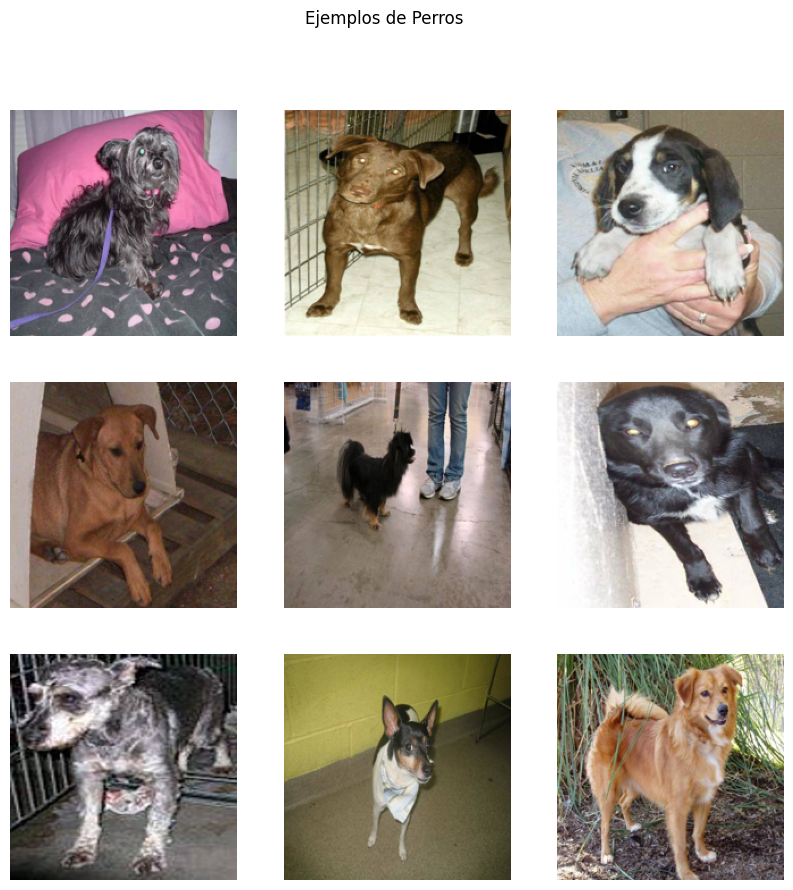

In [3]:
# Cargar 9 imágenes de perros
dog_dir = '../data/train/dogs'
dog_images = [os.path.join(dog_dir, fname) for fname in os.listdir(dog_dir)[:9]]

plt.figure(figsize=(10,10))
for i, img_path in enumerate(dog_images):
    img = Image.open(img_path).resize((200, 200))
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.axis('off')
plt.suptitle('Ejemplos de Perros')
plt.show()

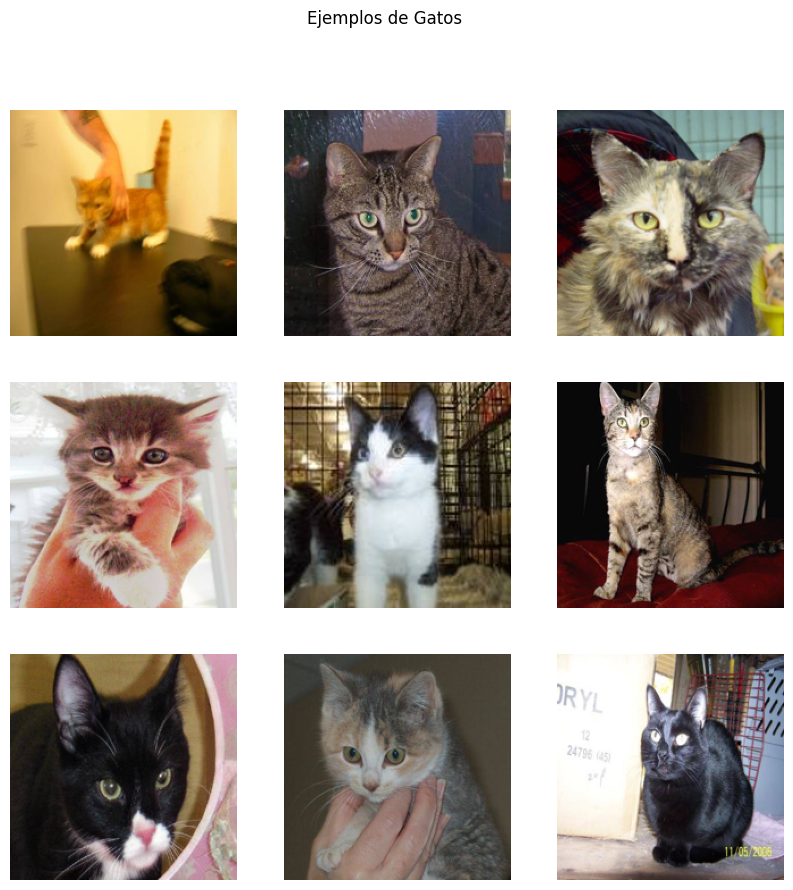

In [4]:
# Cargar 9 imágenes de gatos
cat_dir = '../data/train/cats'
cat_images = [os.path.join(cat_dir, fname) for fname in os.listdir(cat_dir)[:9]]

plt.figure(figsize=(10,10))
for i, img_path in enumerate(cat_images):
    img = Image.open(img_path).resize((200, 200))
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.axis('off')
plt.suptitle('Ejemplos de Gatos')
plt.show()

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '../data/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '../data/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


2025-04-11 17:04:07.641440: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-11 17:04:07.643195: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-11 17:04:07.649090: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-11 17:04:07.665536: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-11 17:04:07.715363: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [6]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# model = Sequential()
# model.add(Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(224,224,3)))
# model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
# model.add(MaxPool2D((2,2)))

# model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
# model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
# model.add(MaxPool2D((2,2)))

# model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
# model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
# model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
# model.add(MaxPool2D((2,2)))

# model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
# model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
# model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
# model.add(MaxPool2D((2,2)))

# model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
# model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
# model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
# model.add(MaxPool2D((2,2)))

# model.add(Flatten())
# model.add(Dense(4096, activation='relu'))
# model.add(Dense(4096, activation='relu'))
# model.add(Dense(2, activation='softmax'))

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Cargar VGG16 sin las capas densas (top), con pesos de ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Congelar pesos

# Añadir capas finales personalizadas
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
import time
from keras.callbacks import ModelCheckpoint, EarlyStopping

import time
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Temporizador de ejecución
start_time = time.time()

# Entrenamiento
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[checkpoint, early_stop]
)

end_time = time.time()
total_time = end_time - start_time

print(f"\n⏱️ Entrenamiento completado en {total_time // 60:.0f} minutos y {total_time % 60:.0f} segundos.")

/home/vscode/.local/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
233/625 ━━━━━━━━━━━━━━━━━━━━ 40:11 6s/step - accuracy: 0.8060 - loss: 0.4259

In [ ]:
from keras.models import load_model

best_model = load_model('best_model.h5')
loss, acc = best_model.evaluate(val_generator)
print(f'Accuracy en validación: {acc*100:.2f}%')

In [ ]:
best_model.save('modelo_final_perros_vs_gatos.keras')

## visual del resultado hasta la segunda epoca, que fue hasta donde se pudo ejecutar.

/home/vscode/.local/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8490 - loss: 0.3377
WARNING:absl:You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 
625/625 ━━━━━━━━━━━━━━━━━━━━ 5015s 8s/step - accuracy: 0.8491 - loss: 0.3376 - val_accuracy: 0.9236 - val_loss: 0.1881
Epoch 2/10
325/625 ━━━━━━━━━━━━━━━━━━━━ 31:28 6s/step - accuracy: 0.9304 - loss: 0.1758